In [573]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Reading and Understanding the Data

In [574]:
day=pd.read_csv(r'D:\Upgrad Data Science PGDDS\Machine Learning I\day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [575]:
#Checking the shaoe of the dataset
day.shape

(730, 16)

In [576]:
#Getting the info of the dataset
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Hence there are no missing values in the data**

In [577]:
#Describing the data
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Dropping Redundant Columns

**Instant variable has no significance since it's just index. Hence dropping it is safe.**   
**Dropping the dteday variable would also be fine because we have day and month column already.**   
**Dropping the casual and the registered variable because it's already included in the cnt variable.** 

In [578]:
#Dropping redundant columns
day=day.drop(["instant","dteday","casual","registered"],1)

# Encoding the Data

**For a better readability we will convert some of the categorical numerical columns like season, mnth, weekday, weathersit into categorical string columns because they have categorical numerical data which is not easiky understandable**

In [579]:
#Converting all the categorical columns data into readable data for further use
day['weathersit']=day['weathersit'].map({1:'Clear',2:'Mist',3:'Light_Snow',4:'Heavy_Rain'})
day['season']=day['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
day['mnth']=day['mnth'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August'
                                                              ,'September','October','November','December'))
day['weekday']=day['weekday'].replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))

In [580]:
#Inspecting the dataset
day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,December,0,Friday,1,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,December,0,Saturday,0,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,December,0,Sunday,0,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,December,0,Monday,1,Clear,10.489153,11.58500,48.3333,23.500518,1796


## Visualizing Numerical Variables

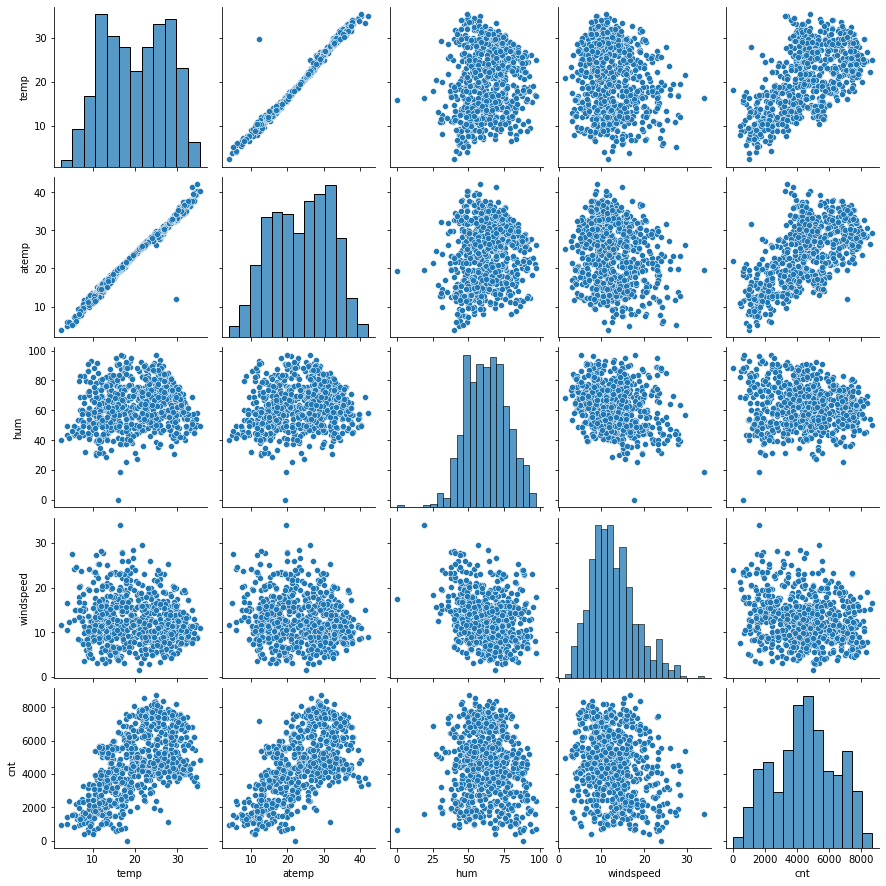

In [581]:
num_var=['temp','atemp','hum','windspeed','cnt']
sns.pairplot(day[num_var])
plt.show()

## Visualizing Categorical Variables

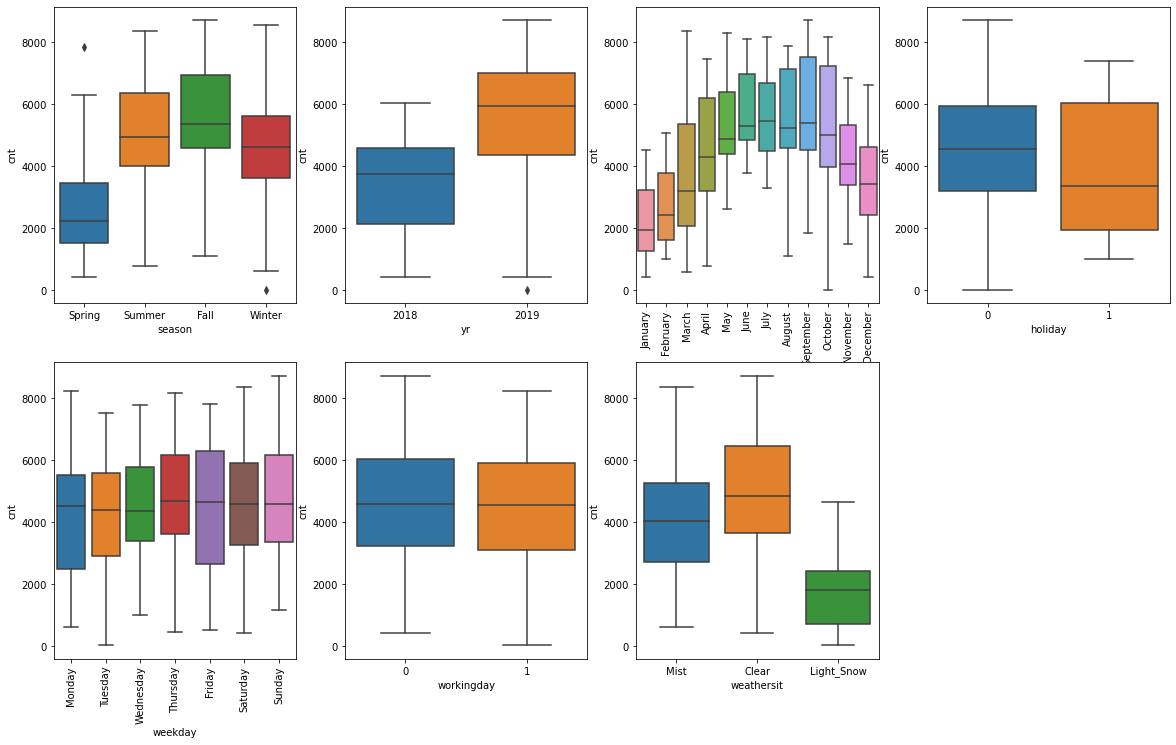

In [582]:
plt.figure(figsize=[20,12])
plt.subplot(2,4,1)
sns.boxplot(data=day,x='season',y='cnt')
plt.subplot(2,4,2)
sns.boxplot(data=day,x='yr',y='cnt')
position=(0,1)
labels=("2018","2019")
plt.xticks(position,labels)
plt.subplot(2,4,3)
sns.boxplot(data=day,x='mnth',y='cnt')
plt.xticks(rotation=90)
plt.subplot(2,4,4)
sns.boxplot(data=day,x='holiday',y='cnt')
plt.subplot(2,4,5)
sns.boxplot(data=day,x='weekday',y='cnt')
plt.xticks(rotation=90)
plt.subplot(2,4,6)
sns.boxplot(data=day,x='workingday',y='cnt')
plt.subplot(2,4,7)
sns.boxplot(data=day,x='weathersit',y='cnt')
plt.show()

In [583]:
day['weathersit'].value_counts()

Clear         463
Mist          246
Light_Snow     21
Name: weathersit, dtype: int64

**We see that during heavy rains there is no bike rental customer which is a very obvious thing though.**

#### Observing and analyzing the season variable

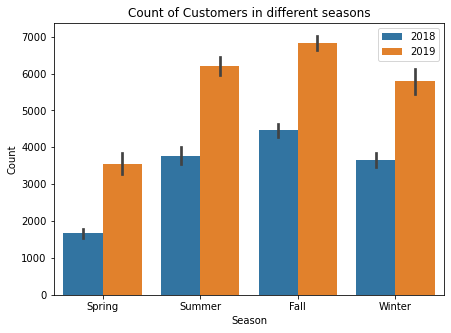

In [584]:
plt.figure(figsize=[7,5])
sns.barplot(x="season",y='cnt',hue="yr",data=day)
p=plt.legend()
p.get_texts()[0].set_text('2018')
p.get_texts()[1].set_text('2019')
plt.title("Count of Customers in different seasons")
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

In [585]:
#Checking the percentage of each value in that categorical variable
day['season'].value_counts(normalize=True)*100

Fall      25.753425
Summer    25.205479
Spring    24.657534
Winter    24.383562
Name: season, dtype: float64

**1. We see that the bikes have been rented mostly during the fall seaason followed by summer and winter. It's least in the Winter.**

**2. The biker rental service is visibily more in 2019 than in 2018**

#### Observing and analyzing the mnth variable.

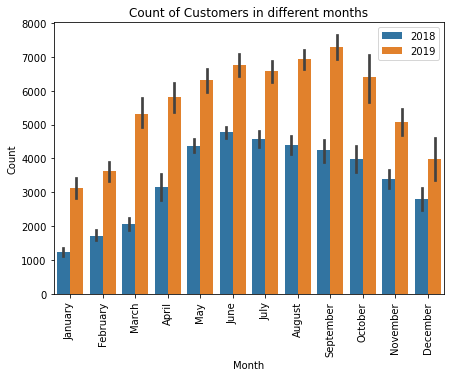

In [586]:
plt.figure(figsize=[7,5])
sns.barplot(x="mnth",y='cnt',hue="yr",data=day)
plt.xticks(rotation=90)
p=plt.legend()
p.get_texts()[0].set_text('2018')
p.get_texts()[1].set_text('2019')
plt.title("Count of Customers in different months")
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [587]:
#Checking the percentage of each value in that categorical variable
day['mnth'].value_counts(normalize=True)*100

May          8.493151
December     8.493151
August       8.493151
January      8.493151
March        8.493151
July         8.493151
October      8.493151
June         8.219178
April        8.219178
September    8.219178
November     8.219178
February     7.671233
Name: mnth, dtype: float64

#### Observing and analyzing the weekday variable

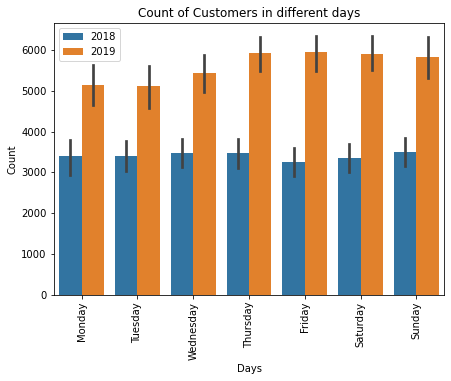

In [588]:
plt.figure(figsize=[7,5])
sns.barplot(x="weekday",y='cnt',hue="yr",data=day)
plt.xticks(rotation=90)
p=plt.legend()
p.get_texts()[0].set_text('2018')
p.get_texts()[1].set_text('2019')
plt.title("Count of Customers in different days")
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

In [589]:
#Checking the percentage of each value in that categorical variable
day['weekday'].value_counts(normalize=True)*100

Monday       14.383562
Tuesday      14.383562
Thursday     14.246575
Friday       14.246575
Wednesday    14.246575
Sunday       14.246575
Saturday     14.246575
Name: weekday, dtype: float64

#### Observing and analyzing the holiday variable

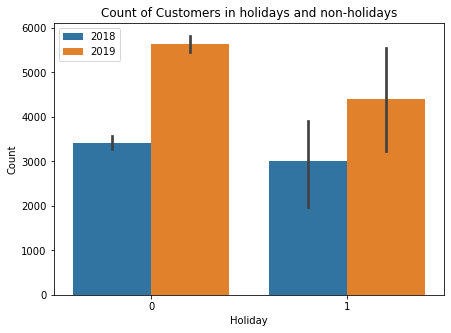

In [590]:
plt.figure(figsize=[7,5])
sns.barplot(x="holiday",y='cnt',hue="yr",data=day)
p=plt.legend()
p.get_texts()[0].set_text('2018')
p.get_texts()[1].set_text('2019')
plt.title("Count of Customers in holidays and non-holidays")
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

In [591]:
#Checking the percentage of each value in that categorical variable
day['holiday'].value_counts(normalize=True)*100

0    97.123288
1     2.876712
Name: holiday, dtype: float64

#### Observing and analyzing the weathersit variable

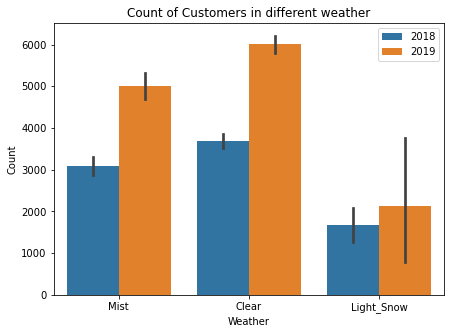

In [592]:
plt.figure(figsize=[7,5])
sns.barplot(x="weathersit",y='cnt',hue="yr",data=day)
p=plt.legend()
p.get_texts()[0].set_text('2018')
p.get_texts()[1].set_text('2019')
plt.title("Count of Customers in different weather")
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

In [593]:
#Checking the percentage of each value in that categorical variable
day['weathersit'].value_counts(normalize=True)*100

Clear         63.424658
Mist          33.698630
Light_Snow     2.876712
Name: weathersit, dtype: float64

#### Observing and analyzing the workingday variable

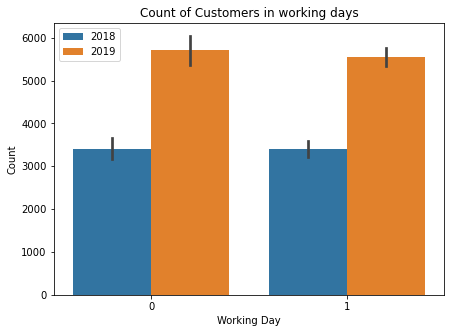

In [594]:
plt.figure(figsize=[7,5])
sns.barplot(x="workingday",y='cnt',hue="yr",data=day)
p=plt.legend()
p.get_texts()[0].set_text('2018')
p.get_texts()[1].set_text('2019')
plt.title("Count of Customers in working days")
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

In [595]:
#Checking the percentage of each value in that categorical variable
day['workingday'].value_counts(normalize=True)

1    0.690411
0    0.309589
Name: workingday, dtype: float64

**Year is a pivotal parameter in this model because as compared to 2018, 2019 sales are up.**

# Preparing Data for Data Modelling

## Dummy Variable

In [596]:
#Creating dummy variables for Season
season = pd.get_dummies(day['season'],drop_first = True)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [597]:
#Creating dummy variables for mnth
month=pd.get_dummies(day["mnth"],drop_first=True)
month.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [598]:
#Creating dummy variables for weekday
weekday=pd.get_dummies(day["weekday"],drop_first=True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [599]:
#Creating dummy variables for weathersit
weather = pd.get_dummies(day['weathersit'], drop_first = True)
weather.head()

,Light_Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


**Ideally there should be 3 columns because there are 4 levels. But we have only 2 columns because there is no heavy_rain column i.e there is no heavy rain entry in the data.**

In [600]:
#Concating all of them with the main dataset
new_day=pd.concat([day,season,month,weather,weekday],1)
new_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,October,September,Light_Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [601]:
#Checking the shape of the new dataframe
new_day.shape

(730, 34)

In [602]:
#Dropping the previous variables
new_day=new_day.drop(['season','mnth','weathersit','weekday'],1)

In [603]:
#Checking the shape of the new dataframe
new_day.shape

(730, 30)

In [604]:
new_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Spring      730 non-null    uint8  
 9   Summer      730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  August      730 non-null    uint8  
 12  December    730 non-null    uint8  
 13  February    730 non-null    uint8  
 14  January     730 non-null    uint8  
 15  July        730 non-null    uint8  
 16  June        730 non-null    uint8  
 17  March       730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  November    730 non-null    u

**1. Hence there are no null values in the data.**

**2. All the columns in the data is now numeric data. Hence we are good to go for data modelling.**

# Splitting the Data into Train test

In [605]:
day_train,day_test=train_test_split(new_day,train_size=0.7,random_state=100)
print(day_train.shape)
print(day_test.shape)

(510, 30)
(220, 30)


**We do a 70%-30% split here.**

**Since there are very differing units in the predictor variables, we would want to rescale the numerical variables to a common scale using Min-Max.**

## Rescaling the features

In [606]:
scaler = MinMaxScaler()

In [607]:
#Training data before rescaling
day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Light_Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,1,0,0,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,1,0,0,1,0,0,0


In [608]:
#Fitting and transforming the numerical columns
num_vars=['temp','atemp','hum','windspeed','cnt']
day_train[num_vars]=scaler.fit_transform(day_train[num_vars])

<ipython-input-608-f399dd1a462e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_train[num_vars]=scaler.fit_transform(day_train[num_vars])
C:\Users\deabh\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [609]:
#Training data after rescaling
day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Light_Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,1,0,0,1,0,0,0


## Plotting a heatmap for the understanding of the variables

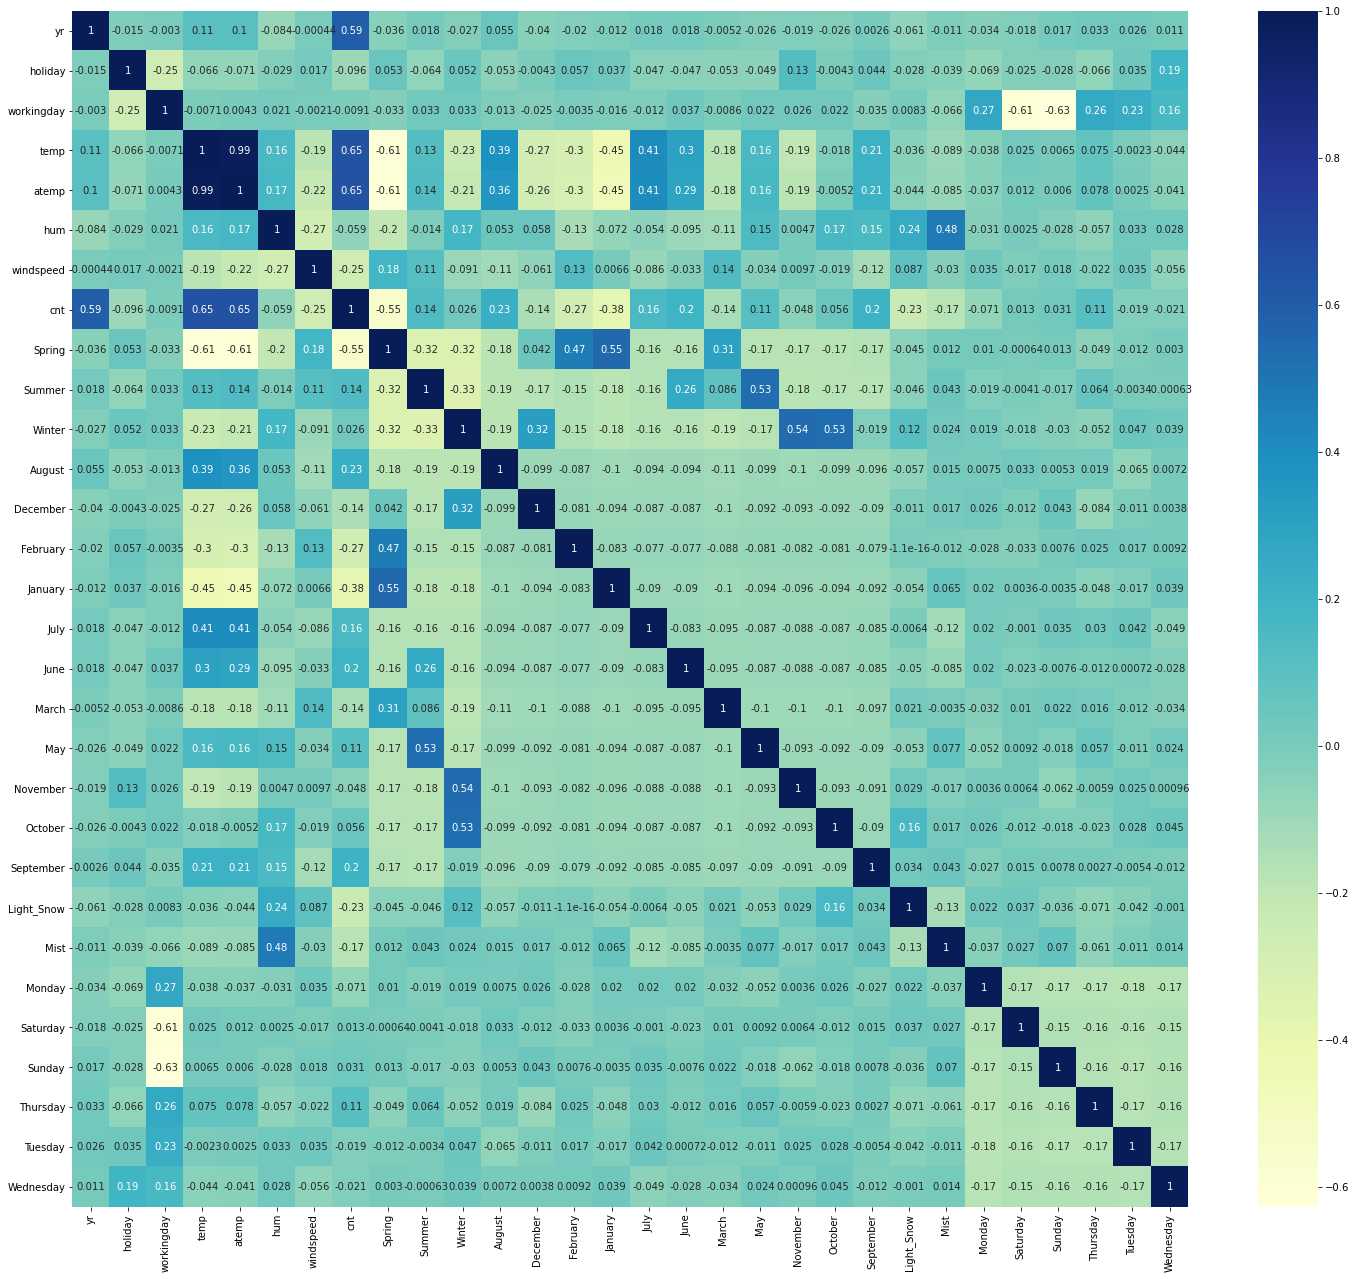

In [610]:
plt.figure(figsize=[25,22])
sns.heatmap(day_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

**1. As we can see that atemp and temp has high correlation. Hence using both will lead to multi-collinearity. We should use eiter of them.**  
**2. yr also has a strong correlation with cnt.**  
**3. Many months have a strong correlation with various weathers.**  
**4. Spring variable has high negative correlation with cnt variable.**  
**5. Mist and hum has good positive correlation.**

# Building a linear model

In [611]:
#Building X and y variables
y_train=day_train.pop("cnt")
X_train=day_train

**We will use RFE which is a automatic way to consider variables and then manually tune it accordingly for better model.**

In [612]:
#Using RFE
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,n_features_to_select=26)
rfe=rfe.fit(X_train,y_train)

In [613]:
#Seeing the list of variables and rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', True, 1),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', True, 1),
 ('March', False, 4),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 2),
 ('September', True, 1),
 ('Light_Snow', True, 1),
 ('Mist', True, 1),
 ('Monday', True, 1),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 3),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1)]

In [614]:
# Adding all the columns included by RFE in a variable
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'May', 'November', 'September', 'Light_Snow',
       'Mist', 'Monday', 'Saturday', 'Sunday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [615]:
X_train.columns[~rfe.support_]

Index(['March', 'October', 'Thursday'], dtype='object')

In [616]:
#Making a dataframe using the columns included in the RFE
X_train_rfe=X_train[col]

In [617]:
#Adding constant to the train dataset
X_train_lm1=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_lm1).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.24e-180
Time:                        18:29:35   Log-Likelihood:                 523.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     483   BIC:                            -877.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3957      0.083      4.785      0.000       0.233       0.558
yr             0.2312      0.008     28.487      0.000       0.215       0.247
holiday       -0.1345      0.065     -2.059      0.040      -0.263      -0.006
workingday    -0.0606      0.071     -0.853      0.394      -0.200       0.079
temp           0.3875      0.143      2.710      0.007       0.107       0.668
atemp          0.0548      0.139      0.394      0.694      -0.218       0.328
hum           -0.1575      0.039     -4.087      0.000      -0.233      -0.082
windspeed     -0.1803      0.027     -6.786      0.000      -0.232      -0.128
Spring        -0.0416      0.028     -1.485      0.138      -0.097       0.013
Summer         0.0442      0.024      1.848      0.065      -0.003       0.091
Winter         0.1145      0.024      4.683      0.000       0.066       0.163
August         0.0266      0.030      0.894      0.372      -0.032       0.085
December      -0.0486      0.019     -2.617      0.009      -0.085      -0.012
February      -0.0389      0.022     -1.778      0.076      -0.082       0.004
January       -0.0658      0.022     -2.992      0.003      -0.109      -0.023
July          -0.0296      0.031     -0.947      0.344      -0.091       0.032
June           0.0081      0.023      0.350      0.727      -0.037       0.054
May            0.0249      0.020      1.255      0.210      -0.014       0.064
November      -0.0445      0.019     -2.307      0.021      -0.082      -0.007
September      0.0885      0.025      3.544      0.000       0.039       0.138
Light_Snow    -0.2498      0.027     -9.418      0.000      -0.302      -0.198
Mist          -0.0579      0.010     -5.520      0.000      -0.079      -0.037
Monday        -0.0266      0.013     -2.121      0.034      -0.051      -0.002
Saturday      -0.0578      0.071     -0.812      0.417      -0.198       0.082
Sunday        -0.0520      0.071     -0.731      0.465      -0.192       0.088
Tuesday       -0.0282      0.013     -2.235      0.026      -0.053      -0.003
Wednesday     -0.0123      0.013     -0.919      0.359      -0.039       0.014
==============================================================================
Omnibus:                       78.453   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.587
Skew:                          -0.766   Prob(JB):                     1.38e-45
Kurtosis:                       5.716   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [618]:
#Checking VIF values of all the variables for that dataframe
vif=pd.DataFrame()
X=X_train_rfe
vif["Feautures"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feautures,VIF
3,temp,441.07
4,atemp,381.93
2,workingday,54.72
5,hum,39.97
7,Spring,11.19
23,Sunday,10.86
22,Saturday,10.47
9,Winter,8.99
8,Summer,8.35
6,windspeed,5.85


**We see that the P-value of the variable June is high. Hence dropping it.**

In [619]:
X_train_new=X_train_rfe.drop("June",1)

In [620]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm2=sm.add_constant(X_train_new)
lr2=sm.OLS(y_train,X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.25e-181
Time:                        18:29:35   Log-Likelihood:                 522.95
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     484   BIC:                            -883.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3953      0.083      4.785      0.000       0.233       0.558
yr             0.2310      0.008     28.595      0.000       0.215       0.247
holiday       -0.1344      0.065     -2.059      0.040      -0.263      -0.006
workingday    -0.0596      0.071     -0.841      0.401      -0.199       0.080
temp           0.4025      0.136      2.954      0.003       0.135       0.670
atemp          0.0481      0.138      0.350      0.727      -0.222       0.318
hum           -0.1593      0.038     -4.173      0.000      -0.234      -0.084
windspeed     -0.1815      0.026     -6.903      0.000      -0.233      -0.130
Spring        -0.0442      0.027     -1.638      0.102      -0.097       0.009
Summer         0.0429      0.024      1.817      0.070      -0.003       0.089
Winter         0.1117      0.023      4.852      0.000       0.066       0.157
August         0.0204      0.024      0.854      0.394      -0.027       0.067
December      -0.0477      0.018     -2.596      0.010      -0.084      -0.012
February      -0.0378      0.022     -1.747      0.081      -0.080       0.005
January       -0.0642      0.021     -2.990      0.003      -0.106      -0.022
July          -0.0363      0.025     -1.458      0.146      -0.085       0.013
May            0.0216      0.017      1.236      0.217      -0.013       0.056
November      -0.0439      0.019     -2.289      0.023      -0.082      -0.006
September      0.0841      0.022      3.891      0.000       0.042       0.127
Light_Snow    -0.2498      0.027     -9.425      0.000      -0.302      -0.198
Mist          -0.0577      0.010     -5.514      0.000      -0.078      -0.037
Monday        -0.0263      0.013     -2.105      0.036      -0.051      -0.002
Saturday      -0.0569      0.071     -0.800      0.424      -0.197       0.083
Sunday        -0.0510      0.071     -0.718      0.473      -0.190       0.089
Tuesday       -0.0281      0.013     -2.228      0.026      -0.053      -0.003
Wednesday     -0.0122      0.013     -0.910      0.363      -0.038       0.014
==============================================================================
Omnibus:                       77.822   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.187
Skew:                          -0.765   Prob(JB):                     1.25e-44
Kurtosis:                       5.679   Cond. No.                         89.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**We see that the variable atemp has a high p-value.**

In [621]:
X_train_new=X_train_new.drop("atemp",1)

In [622]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm3=sm.add_constant(X_train_new)
lr3=sm.OLS(y_train,X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.22e-182
Time:                        18:29:35   Log-Likelihood:                 522.88
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     485   BIC:                            -889.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3950      0.083      4.786      0.000       0.233       0.557
yr             0.2309      0.008     28.619      0.000       0.215       0.247
holiday       -0.1346      0.065     -2.064      0.040      -0.263      -0.006
workingday    -0.0593      0.071     -0.838      0.402      -0.198       0.080
temp           0.4482      0.039     11.556      0.000       0.372       0.524
hum           -0.1586      0.038     -4.164      0.000      -0.233      -0.084
windspeed     -0.1833      0.026     -7.121      0.000      -0.234      -0.133
Spring        -0.0434      0.027     -1.618      0.106      -0.096       0.009
Summer         0.0436      0.023      1.859      0.064      -0.002       0.090
Winter         0.1125      0.023      4.917      0.000       0.068       0.157
August         0.0198      0.024      0.830      0.407      -0.027       0.067
December      -0.0476      0.018     -2.595      0.010      -0.084      -0.012
February      -0.0379      0.022     -1.752      0.080      -0.080       0.005
January       -0.0644      0.021     -3.003      0.003      -0.106      -0.022
July          -0.0363      0.025     -1.459      0.145      -0.085       0.013
May            0.0214      0.017      1.225      0.221      -0.013       0.056
November      -0.0439      0.019     -2.288      0.023      -0.082      -0.006
September      0.0842      0.022      3.896      0.000       0.042       0.127
Light_Snow    -0.2504      0.026     -9.481      0.000      -0.302      -0.199
Mist          -0.0578      0.010     -5.526      0.000      -0.078      -0.037
Monday        -0.0263      0.013     -2.107      0.036      -0.051      -0.002
Saturday      -0.0570      0.071     -0.803      0.422      -0.197       0.083
Sunday        -0.0508      0.071     -0.716      0.474      -0.190       0.089
Tuesday       -0.0281      0.013     -2.228      0.026      -0.053      -0.003
Wednesday     -0.0122      0.013     -0.911      0.363      -0.038       0.014
==============================================================================
Omnibus:                       77.293   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.659
Skew:                          -0.760   Prob(JB):                     2.68e-44
Kurtosis:                       5.671   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Since the P-Value for  variable Sunday is high, we will drop it.**

In [623]:
X_train_new=X_train_new.drop("Sunday",1)

In [624]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm4=sm.add_constant(X_train_new)
lr4=sm.OLS(y_train,X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.42e-183
Time:                        18:29:35   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     486   BIC:                            -895.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3436      0.041      8.442      0.000       0.264       0.424
yr             0.2313      0.008     28.724      0.000       0.215       0.247
holiday       -0.0926      0.029     -3.247      0.001      -0.149      -0.037
workingday    -0.0095      0.013     -0.732      0.465      -0.035       0.016
temp           0.4490      0.039     11.588      0.000       0.373       0.525
hum           -0.1575      0.038     -4.140      0.000      -0.232      -0.083
windspeed     -0.1838      0.026     -7.147      0.000      -0.234      -0.133
Spring        -0.0431      0.027     -1.608      0.109      -0.096       0.010
Summer         0.0437      0.023      1.863      0.063      -0.002       0.090
Winter         0.1123      0.023      4.910      0.000       0.067       0.157
August         0.0194      0.024      0.816      0.415      -0.027       0.066
December      -0.0474      0.018     -2.584      0.010      -0.083      -0.011
February      -0.0375      0.022     -1.736      0.083      -0.080       0.005
January       -0.0641      0.021     -2.995      0.003      -0.106      -0.022
July          -0.0367      0.025     -1.476      0.141      -0.085       0.012
May            0.0211      0.017      1.209      0.227      -0.013       0.055
November      -0.0451      0.019     -2.364      0.018      -0.083      -0.008
September      0.0843      0.022      3.904      0.000       0.042       0.127
Light_Snow    -0.2503      0.026     -9.480      0.000      -0.302      -0.198
Mist          -0.0578      0.010     -5.529      0.000      -0.078      -0.037
Monday        -0.0258      0.012     -2.069      0.039      -0.050      -0.001
Saturday      -0.0074      0.015     -0.483      0.629      -0.037       0.023
Tuesday       -0.0273      0.013     -2.174      0.030      -0.052      -0.003
Wednesday     -0.0109      0.013     -0.824      0.411      -0.037       0.015
==============================================================================
Omnibus:                       77.267   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.188
Skew:                          -0.765   Prob(JB):                     1.52e-43
Kurtosis:                       5.634   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Dropping variable Saturday since it has high P-Value.**

In [625]:
X_train_new=X_train_new.drop("Saturday",1)

In [626]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm5=sm.add_constant(X_train_new)
lr5=sm.OLS(y_train,X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.41e-184
Time:                        18:29:35   Log-Likelihood:                 522.49
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     487   BIC:                            -901.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3403      0.040      8.486      0.000       0.262       0.419
yr             0.2314      0.008     28.774      0.000       0.216       0.247
holiday       -0.0895      0.028     -3.223      0.001      -0.144      -0.035
workingday    -0.0059      0.011     -0.556      0.579      -0.027       0.015
temp           0.4486      0.039     11.590      0.000       0.373       0.525
hum           -0.1575      0.038     -4.144      0.000      -0.232      -0.083
windspeed     -0.1835      0.026     -7.143      0.000      -0.234      -0.133
Spring        -0.0436      0.027     -1.626      0.105      -0.096       0.009
Summer         0.0434      0.023      1.852      0.065      -0.003       0.089
Winter         0.1120      0.023      4.905      0.000       0.067       0.157
August         0.0191      0.024      0.803      0.422      -0.028       0.066
December      -0.0472      0.018     -2.578      0.010      -0.083      -0.011
February      -0.0372      0.022     -1.726      0.085      -0.080       0.005
January       -0.0641      0.021     -2.998      0.003      -0.106      -0.022
July          -0.0367      0.025     -1.477      0.140      -0.085       0.012
May            0.0210      0.017      1.205      0.229      -0.013       0.055
November      -0.0456      0.019     -2.397      0.017      -0.083      -0.008
September      0.0841      0.022      3.899      0.000       0.042       0.126
Light_Snow    -0.2508      0.026     -9.516      0.000      -0.303      -0.199
Mist          -0.0577      0.010     -5.524      0.000      -0.078      -0.037
Monday        -0.0258      0.012     -2.069      0.039      -0.050      -0.001
Tuesday       -0.0273      0.013     -2.174      0.030      -0.052      -0.003
Wednesday     -0.0108      0.013     -0.819      0.413      -0.037       0.015
==============================================================================
Omnibus:                       76.140   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.055
Skew:                          -0.755   Prob(JB):                     7.27e-43
Kurtosis:                       5.618   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Dropping Variable Workingday because of high P-Value.**

In [627]:
X_train_new=X_train_new.drop("workingday",1)

In [628]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm6=sm.add_constant(X_train_new)
lr6=sm.OLS(y_train,X_train_lm6).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.41e-185
Time:                        18:29:35   Log-Likelihood:                 522.33
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3374      0.040      8.492      0.000       0.259       0.415
yr             0.2314      0.008     28.798      0.000       0.216       0.247
holiday       -0.0841      0.026     -3.237      0.001      -0.135      -0.033
temp           0.4486      0.039     11.597      0.000       0.373       0.525
hum           -0.1585      0.038     -4.180      0.000      -0.233      -0.084
windspeed     -0.1835      0.026     -7.148      0.000      -0.234      -0.133
Spring        -0.0432      0.027     -1.615      0.107      -0.096       0.009
Summer         0.0436      0.023      1.861      0.063      -0.002       0.090
Winter         0.1124      0.023      4.927      0.000       0.068       0.157
August         0.0195      0.024      0.821      0.412      -0.027       0.066
December      -0.0470      0.018     -2.569      0.011      -0.083      -0.011
February      -0.0375      0.022     -1.742      0.082      -0.080       0.005
January       -0.0642      0.021     -3.001      0.003      -0.106      -0.022
July          -0.0360      0.025     -1.453      0.147      -0.085       0.013
May            0.0209      0.017      1.202      0.230      -0.013       0.055
November      -0.0462      0.019     -2.433      0.015      -0.084      -0.009
September      0.0844      0.022      3.916      0.000       0.042       0.127
Light_Snow    -0.2505      0.026     -9.513      0.000      -0.302      -0.199
Mist          -0.0571      0.010     -5.500      0.000      -0.078      -0.037
Monday        -0.0286      0.011     -2.513      0.012      -0.051      -0.006
Tuesday       -0.0300      0.012     -2.609      0.009      -0.053      -0.007
Wednesday     -0.0136      0.012     -1.107      0.269      -0.038       0.010
==============================================================================
Omnibus:                       74.723   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.138
Skew:                          -0.739   Prob(JB):                     1.90e-42
Kurtosis:                       5.619   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Dropping August because of high P-Value.**

In [629]:
X_train_new=X_train_new.drop("August",1)

In [630]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm7=sm.add_constant(X_train_new)
lr7=sm.OLS(y_train,X_train_lm7).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.66e-186
Time:                        18:29:36   Log-Likelihood:                 521.98
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3483      0.037      9.299      0.000       0.275       0.422
yr             0.2316      0.008     28.843      0.000       0.216       0.247
holiday       -0.0847      0.026     -3.260      0.001      -0.136      -0.034
temp           0.4510      0.039     11.695      0.000       0.375       0.527
hum           -0.1572      0.038     -4.149      0.000      -0.232      -0.083
windspeed     -0.1837      0.026     -7.157      0.000      -0.234      -0.133
Spring        -0.0557      0.022     -2.523      0.012      -0.099      -0.012
Summer         0.0304      0.017      1.784      0.075      -0.003       0.064
Winter         0.1009      0.018      5.614      0.000       0.066       0.136
December      -0.0480      0.018     -2.627      0.009      -0.084      -0.012
February      -0.0375      0.022     -1.742      0.082      -0.080       0.005
January       -0.0642      0.021     -3.001      0.003      -0.106      -0.022
July          -0.0499      0.018     -2.751      0.006      -0.085      -0.014
May            0.0205      0.017      1.177      0.240      -0.014       0.055
November      -0.0475      0.019     -2.506      0.013      -0.085      -0.010
September      0.0733      0.017      4.371      0.000       0.040       0.106
Light_Snow    -0.2516      0.026     -9.568      0.000      -0.303      -0.200
Mist          -0.0568      0.010     -5.474      0.000      -0.077      -0.036
Monday        -0.0283      0.011     -2.489      0.013      -0.051      -0.006
Tuesday       -0.0302      0.012     -2.624      0.009      -0.053      -0.008
Wednesday     -0.0133      0.012     -1.090      0.276      -0.037       0.011
==============================================================================
Omnibus:                       75.856   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.791
Skew:                          -0.750   Prob(JB):                     5.03e-43
Kurtosis:                       5.630   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Dropping variable Wednesday as high P-Value.**

In [631]:
X_train_new=X_train_new.drop("Wednesday",1)

In [632]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm8=sm.add_constant(X_train_new)
lr8=sm.OLS(y_train,X_train_lm8).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.45e-187
Time:                        18:29:36   Log-Likelihood:                 521.36
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3449      0.037      9.238      0.000       0.272       0.418
yr             0.2314      0.008     28.820      0.000       0.216       0.247
holiday       -0.0902      0.025     -3.540      0.000      -0.140      -0.040
temp           0.4530      0.039     11.758      0.000       0.377       0.529
hum           -0.1584      0.038     -4.183      0.000      -0.233      -0.084
windspeed     -0.1827      0.026     -7.120      0.000      -0.233      -0.132
Spring        -0.0548      0.022     -2.484      0.013      -0.098      -0.011
Summer         0.0307      0.017      1.800      0.072      -0.003       0.064
Winter         0.1004      0.018      5.589      0.000       0.065       0.136
December      -0.0472      0.018     -2.588      0.010      -0.083      -0.011
February      -0.0377      0.022     -1.749      0.081      -0.080       0.005
January       -0.0646      0.021     -3.021      0.003      -0.107      -0.023
July          -0.0497      0.018     -2.741      0.006      -0.085      -0.014
May            0.0201      0.017      1.153      0.249      -0.014       0.054
November      -0.0461      0.019     -2.442      0.015      -0.083      -0.009
September      0.0739      0.017      4.412      0.000       0.041       0.107
Light_Snow    -0.2511      0.026     -9.552      0.000      -0.303      -0.199
Mist          -0.0566      0.010     -5.454      0.000      -0.077      -0.036
Monday        -0.0258      0.011     -2.318      0.021      -0.048      -0.004
Tuesday       -0.0275      0.011     -2.446      0.015      -0.050      -0.005
==============================================================================
Omnibus:                       74.663   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.519
Skew:                          -0.732   Prob(JB):                     3.50e-43
Kurtosis:                       5.657   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Dropping Variable May as high P-Value.**

In [633]:
X_train_new=X_train_new.drop("May",1)

In [634]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm9=sm.add_constant(X_train_new)
lr9=sm.OLS(y_train,X_train_lm9).fit()
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.77e-188
Time:                        18:29:36   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3360      0.037      9.195      0.000       0.264       0.408
yr             0.2309      0.008     28.790      0.000       0.215       0.247
holiday       -0.0909      0.025     -3.570      0.000      -0.141      -0.041
temp           0.4607      0.038     12.142      0.000       0.386       0.535
hum           -0.1529      0.038     -4.068      0.000      -0.227      -0.079
windspeed     -0.1841      0.026     -7.182      0.000      -0.234      -0.134
Spring        -0.0515      0.022     -2.353      0.019      -0.094      -0.008
Summer         0.0393      0.015      2.562      0.011       0.009       0.069
Winter         0.1022      0.018      5.711      0.000       0.067       0.137
December      -0.0461      0.018     -2.527      0.012      -0.082      -0.010
February      -0.0365      0.022     -1.694      0.091      -0.079       0.006
January       -0.0631      0.021     -2.957      0.003      -0.105      -0.021
July          -0.0500      0.018     -2.760      0.006      -0.086      -0.014
November      -0.0447      0.019     -2.369      0.018      -0.082      -0.008
September      0.0739      0.017      4.410      0.000       0.041       0.107
Light_Snow    -0.2528      0.026     -9.626      0.000      -0.304      -0.201
Mist          -0.0568      0.010     -5.471      0.000      -0.077      -0.036
Monday        -0.0264      0.011     -2.367      0.018      -0.048      -0.004
Tuesday       -0.0278      0.011     -2.477      0.014      -0.050      -0.006
==============================================================================
Omnibus:                       73.404   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.627
Skew:                          -0.735   Prob(JB):                     1.34e-40
Kurtosis:                       5.546   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Dropping February because of high P-Value.**


In [635]:
X_train_new=X_train_new.drop("February",1)

In [636]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm10=sm.add_constant(X_train_new)
lr10=sm.OLS(y_train,X_train_lm10).fit()
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.21e-188
Time:                        18:29:36   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -926.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3239      0.036      9.021      0.000       0.253       0.394
yr             0.2305      0.008     28.700      0.000       0.215       0.246
holiday       -0.0933      0.025     -3.662      0.000      -0.143      -0.043
temp           0.4771      0.037     12.975      0.000       0.405       0.549
hum           -0.1549      0.038     -4.117      0.000      -0.229      -0.081
windspeed     -0.1829      0.026     -7.124      0.000      -0.233      -0.132
Spring        -0.0615      0.021     -2.912      0.004      -0.103      -0.020
Summer         0.0427      0.015      2.803      0.005       0.013       0.073
Winter         0.1040      0.018      5.810      0.000       0.069       0.139
December      -0.0366      0.017     -2.107      0.036      -0.071      -0.002
January       -0.0436      0.018     -2.421      0.016      -0.079      -0.008
July          -0.0510      0.018     -2.812      0.005      -0.087      -0.015
November      -0.0397      0.019     -2.128      0.034      -0.076      -0.003
September      0.0755      0.017      4.502      0.000       0.043       0.108
Light_Snow    -0.2514      0.026     -9.559      0.000      -0.303      -0.200
Mist          -0.0565      0.010     -5.432      0.000      -0.077      -0.036
Monday        -0.0258      0.011     -2.309      0.021      -0.048      -0.004
Tuesday       -0.0280      0.011     -2.487      0.013      -0.050      -0.006
==============================================================================
Omnibus:                       68.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.059
Skew:                          -0.691   Prob(JB):                     1.18e-37
Kurtosis:                       5.468   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [637]:
#Checking VIF Values in model
vif=pd.DataFrame()
X=X_train_lm10
vif["Feautures"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feautures,VIF
0,const,82.99
6,Spring,5.28
3,temp,4.43
8,Winter,3.84
7,Summer,2.77
4,hum,1.94
12,November,1.77
10,January,1.68
15,Mist,1.57
11,July,1.50


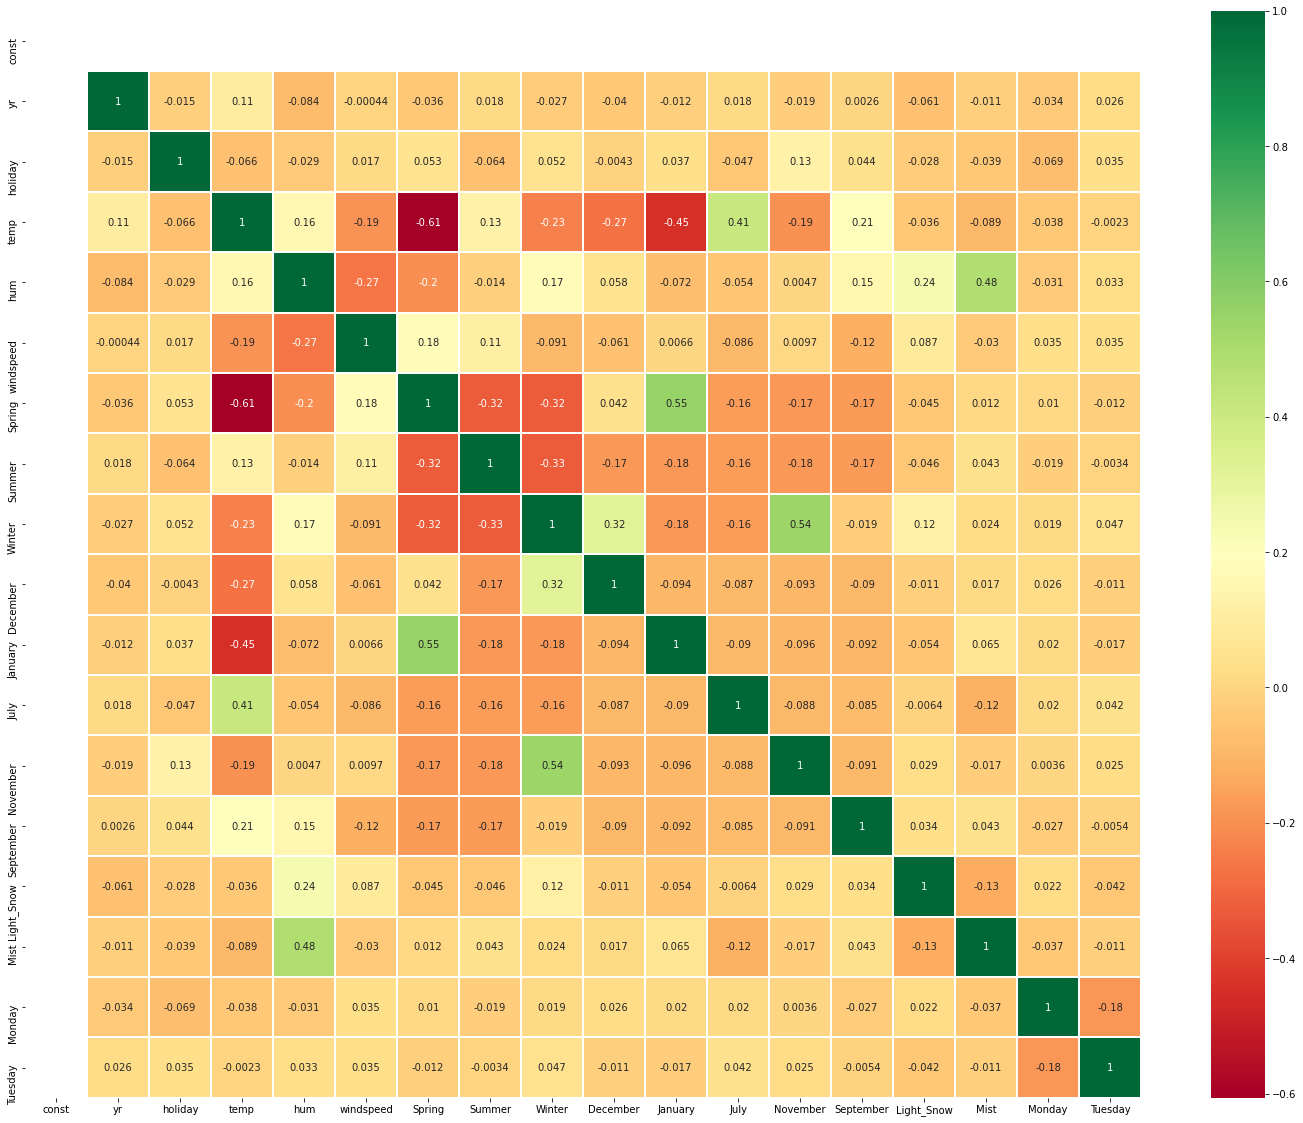

In [638]:
#Plotting heatmap to check the correlation
plt.figure(figsize = (25,20))
ax= sns.heatmap(X_train_lm10.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

**Dropping Spring Variable because of high VIF value and high correlation other predictor variable.**

In [639]:
X_train_new=X_train_new.drop("Spring",1)

In [640]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm11=sm.add_constant(X_train_new)
lr11=sm.OLS(y_train,X_train_lm11).fit()
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.01e-188
Time:                        18:29:42   Log-Likelihood:                 514.83
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     493   BIC:                            -923.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2601      0.029      9.078      0.000       0.204       0.316
yr             0.2292      0.008     28.365      0.000       0.213       0.245
holiday       -0.0966      0.026     -3.768      0.000      -0.147      -0.046
temp           0.5508      0.027     20.498      0.000       0.498       0.604
hum           -0.1667      0.038     -4.423      0.000      -0.241      -0.093
windspeed     -0.1913      0.026     -7.443      0.000      -0.242      -0.141
Summer         0.0734      0.011      6.637      0.000       0.052       0.095
Winter         0.1392      0.013     10.434      0.000       0.113       0.165
December      -0.0307      0.017     -1.764      0.078      -0.065       0.003
January       -0.0474      0.018     -2.622      0.009      -0.083      -0.012
July          -0.0410      0.018     -2.282      0.023      -0.076      -0.006
November      -0.0299      0.019     -1.615      0.107      -0.066       0.006
September      0.0904      0.016      5.620      0.000       0.059       0.122
Light_Snow    -0.2453      0.026     -9.286      0.000      -0.297      -0.193
Mist          -0.0536      0.010     -5.141      0.000      -0.074      -0.033
Monday        -0.0249      0.011     -2.220      0.027      -0.047      -0.003
Tuesday       -0.0286      0.011     -2.520      0.012      -0.051      -0.006
==============================================================================
Omnibus:                       60.116   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.203
Skew:                          -0.659   Prob(JB):                     1.45e-28
Kurtosis:                       5.073   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Dropping November because of high P-Value.**

In [641]:
X_train_new=X_train_new.drop("November",1)

In [642]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm12=sm.add_constant(X_train_new)
lr12=sm.OLS(y_train,X_train_lm12).fit()
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.61e-188
Time:                        18:29:42   Log-Likelihood:                 513.48
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     494   BIC:                            -927.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2538      0.028      8.928      0.000       0.198       0.310
yr             0.2291      0.008     28.316      0.000       0.213       0.245
holiday       -0.1013      0.026     -3.968      0.000      -0.151      -0.051
temp           0.5585      0.026     21.093      0.000       0.507       0.611
hum           -0.1662      0.038     -4.402      0.000      -0.240      -0.092
windspeed     -0.1913      0.026     -7.431      0.000      -0.242      -0.141
Summer         0.0745      0.011      6.742      0.000       0.053       0.096
Winter         0.1282      0.011     11.152      0.000       0.106       0.151
December      -0.0199      0.016     -1.237      0.217      -0.052       0.012
January       -0.0432      0.018     -2.409      0.016      -0.078      -0.008
July          -0.0419      0.018     -2.334      0.020      -0.077      -0.007
September      0.0932      0.016      5.814      0.000       0.062       0.125
Light_Snow    -0.2426      0.026     -9.188      0.000      -0.294      -0.191
Mist          -0.0532      0.010     -5.094      0.000      -0.074      -0.033
Monday        -0.0249      0.011     -2.209      0.028      -0.047      -0.003
Tuesday       -0.0282      0.011     -2.482      0.013      -0.050      -0.006
==============================================================================
Omnibus:                       56.873   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.944
Skew:                          -0.636   Prob(JB):                     2.45e-26
Kurtosis:                       4.984   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Dropping Decemeber because of high P-Value.**

In [643]:
X_train_new=X_train_new.drop("December",1)

In [644]:
#Adding constant and fitting the data to the new train dataframe
X_train_lm13=sm.add_constant(X_train_new)
lr13=sm.OLS(y_train,X_train_lm13).fit()
lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.44e-189
Time:                        18:29:42   Log-Likelihood:                 512.69
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2484      0.028      8.838      0.000       0.193       0.304
yr             0.2290      0.008     28.290      0.000       0.213       0.245
holiday       -0.1003      0.026     -3.929      0.000      -0.150      -0.050
temp           0.5681      0.025     22.408      0.000       0.518       0.618
hum           -0.1709      0.038     -4.546      0.000      -0.245      -0.097
windspeed     -0.1890      0.026     -7.356      0.000      -0.239      -0.138
Summer         0.0762      0.011      6.939      0.000       0.055       0.098
Winter         0.1265      0.011     11.077      0.000       0.104       0.149
January       -0.0381      0.017     -2.181      0.030      -0.072      -0.004
July          -0.0427      0.018     -2.375      0.018      -0.078      -0.007
September      0.0946      0.016      5.915      0.000       0.063       0.126
Light_Snow    -0.2396      0.026     -9.108      0.000      -0.291      -0.188
Mist          -0.0524      0.010     -5.028      0.000      -0.073      -0.032
Monday        -0.0250      0.011     -2.219      0.027      -0.047      -0.003
Tuesday       -0.0277      0.011     -2.443      0.015      -0.050      -0.005
==============================================================================
Omnibus:                       54.548   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.476
Skew:                          -0.617   Prob(JB):                     6.21e-25
Kurtosis:                       4.930   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [645]:
#Calculating VIF for the final model
vif=pd.DataFrame()
X=X_train_lm13
vif["Feautures"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feautures,VIF
0,const,49.88
3,temp,2.07
4,hum,1.89
8,January,1.55
12,Mist,1.55
7,Winter,1.53
9,July,1.44
6,Summer,1.42
11,Light_Snow,1.25
5,windspeed,1.20


**Hence we can say that lr13 is the perfect model for this dataset because:**
1. The P-Values and the VIF values for all predictor variables are low.
2. The F-Statistic is also high.
3. The AIC and the BIC is also very low indicating a good fit.

In [646]:
#Checking all the parameters in the final model
lr13.params

const         0.248422
yr            0.229038
holiday      -0.100285
temp          0.568050
hum          -0.170862
windspeed    -0.188959
Summer        0.076172
Winter        0.126529
January      -0.038077
July         -0.042693
September     0.094594
Light_Snow   -0.239606
Mist         -0.052444
Monday       -0.024982
Tuesday      -0.027742
dtype: float64

**Hencce the best fit line equation is:**  
cnt= 0.248422+ (0.229038 x yr) - (0.100285 x holiday) + (0.568050 x temp) - (0.170862 x hum) -(0.188959 x windspeed) + (0.076172 x Summer) + (0.126529 * Winter) - (0.038077 x January) - (0.042693 x July) + (0.094594 x September) - (0.239606 x Light_Snow) - (0.052444 x Mist) - (0.024982 x Monday) - (0.027742 x Tuesday)



# Residual Analysis of the Train Data

In [647]:
#Predicting values on the final model
y_train_pred=lr13.predict(X_train_lm13)

C:\Users\deabh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


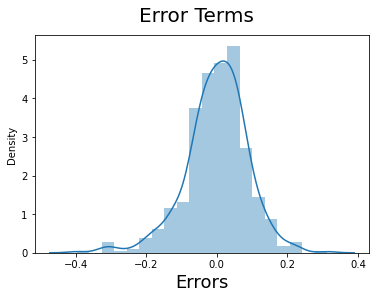

In [648]:
#Calculating residuals and plotting it 
fig = plt.figure()
res=y_train - y_train_pred
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   
plt.show()

**As we can see the residual values are normal around 0.**

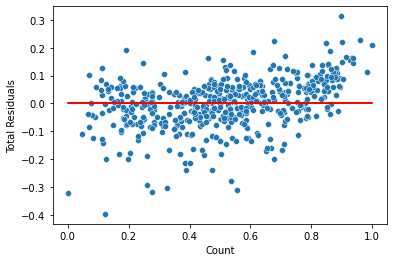

In [649]:
sns.scatterplot(x=y_train,y=res)
plt.plot(y_train,(y_train - y_train), 'r')
plt.xlabel('Count')
plt.ylabel('Total Residuals')
plt.show()

**1. As we can see the all the scatter points are almost at same distance with the line. The error terms have constant variance. Hence homoscedacity is present.**  
**2. Also, in the earlier plots we saw that there is a linear relationship of the dependent/target variable with the predictor variables.**  
**3. The error terms are independent of each other as there is no visible pattern to be seen.**

# Making Predictions Using the Final Model

In [650]:
#Transforming the data variables in the test dataframe
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
day_test[num_vars] = scaler.transform(day_test[num_vars])

<ipython-input-650-a37e2d93b376>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_test[num_vars] = scaler.transform(day_test[num_vars])
C:\Users\deabh\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [651]:
#Describing the test dataframe
day_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Light_Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [652]:
#Splitting test data into x and y
y_test=day_test.pop('cnt')
X_test=day_test

In [653]:
#Selecting the variables that was included in the final model.
X_test_new=X_test[X_train_new.columns]

In [654]:
#Adding constant to the test data.
X_test_new=sm.add_constant(X_test_new)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   temp        220 non-null    float64
 4   hum         220 non-null    float64
 5   windspeed   220 non-null    float64
 6   Summer      220 non-null    uint8  
 7   Winter      220 non-null    uint8  
 8   January     220 non-null    uint8  
 9   July        220 non-null    uint8  
 10  September   220 non-null    uint8  
 11  Light_Snow  220 non-null    uint8  
 12  Mist        220 non-null    uint8  
 13  Monday      220 non-null    uint8  
 14  Tuesday     220 non-null    uint8  
dtypes: float64(4), int64(2), uint8(9)
memory usage: 14.0 KB


In [655]:
#Making predictions using the final model.
y_pred=lr13.predict(X_test_new)

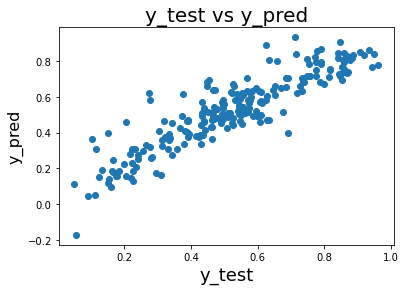

In [656]:
#Plotting y_test vs y_pred to understand the variance
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred',fontsize = 20)
plt.xlabel('y_test',fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)
plt.show()

# R2 Score for the Test Dataframe

In [657]:
r2=r2_score(y_true=y_test,y_pred=y_pred)
r2


0.8063023734698198

**The r2 score of the test data is very much near to that of the train data(0.844) Hence this is a good score and this model is also good.**

## Outcomes

In [658]:
lr13.params

const         0.248422
yr            0.229038
holiday      -0.100285
temp          0.568050
hum          -0.170862
windspeed    -0.188959
Summer        0.076172
Winter        0.126529
January      -0.038077
July         -0.042693
September     0.094594
Light_Snow   -0.239606
Mist         -0.052444
Monday       -0.024982
Tuesday      -0.027742
dtype: float64

**As per the model parameters, the best features are:**  
**1. Temperature(temp): The coeffecient value for this feature is 0.568050 which has a positive impact on the shared bikes business. That means that as the temperature rises, the bike rentals numbers increase.**  

**2. Light Snow(Light_Snow): The coeffecient value for this feature is -0.239606 which has a negative impact on the shared bikes business. That means that if there is snow and rain people don't prefer bike renting.**  

**3. Year(yr): The coeffecient value for this feature is 0.229038 which has a positive impact on the shared bikes business. That means that as the year passes, the bike rentals numbers increase.**
    

# Conclusion

**Hence we should keep these features in our mind while trying to get the maximum possoble profit in this business. As the temperature has a good role to play in the bike rentals numbers, it is highly recommended that the company increase their business during summer season months.**